In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random

np.random.seed(42)
random.seed(42)




data= pd.read_csv('https://raw.githubusercontent.com/Adrian-Cancino/Machine-Learning-ScikitLearn/refs/heads/main/Conjuntos%20de%20datos/housing.csv')
data_num = data.select_dtypes(include=['float64', 'int64'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

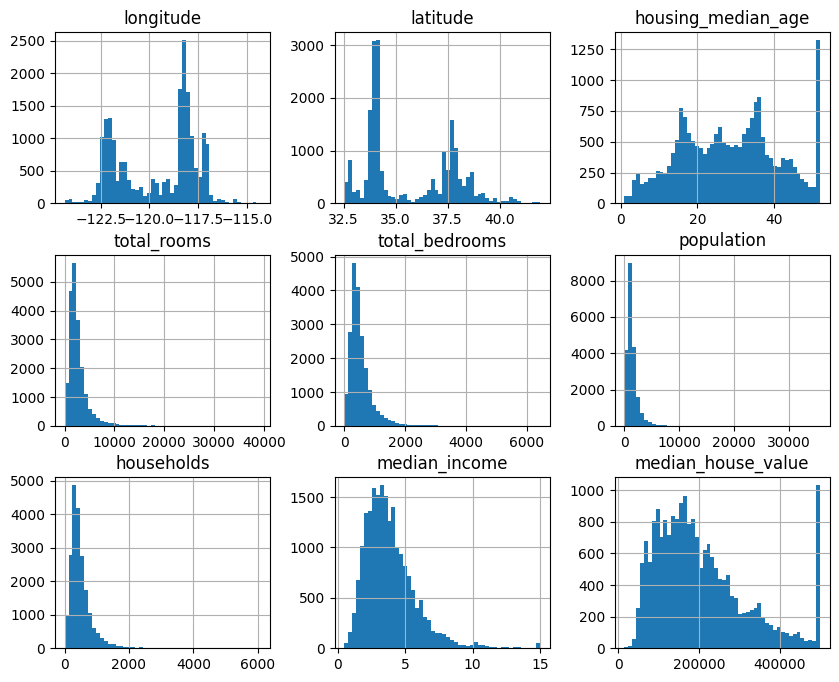

In [45]:
data.hist(bins=50, figsize=(10,8))

<Axes: xlabel='longitude', ylabel='latitude'>

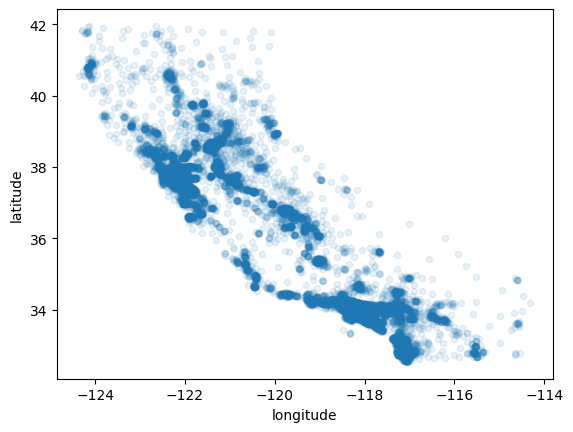

In [46]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)


<Axes: xlabel='longitude', ylabel='latitude'>

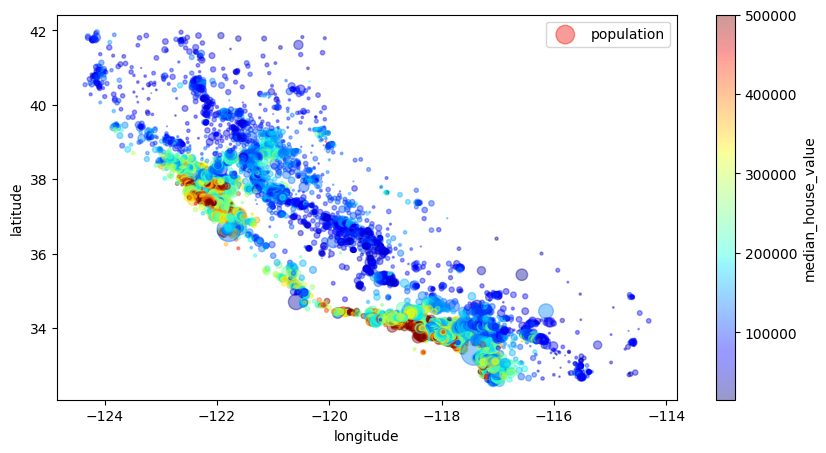

In [47]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.4, s=data['population']/100, label='population', figsize=(10,5), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

<Axes: >

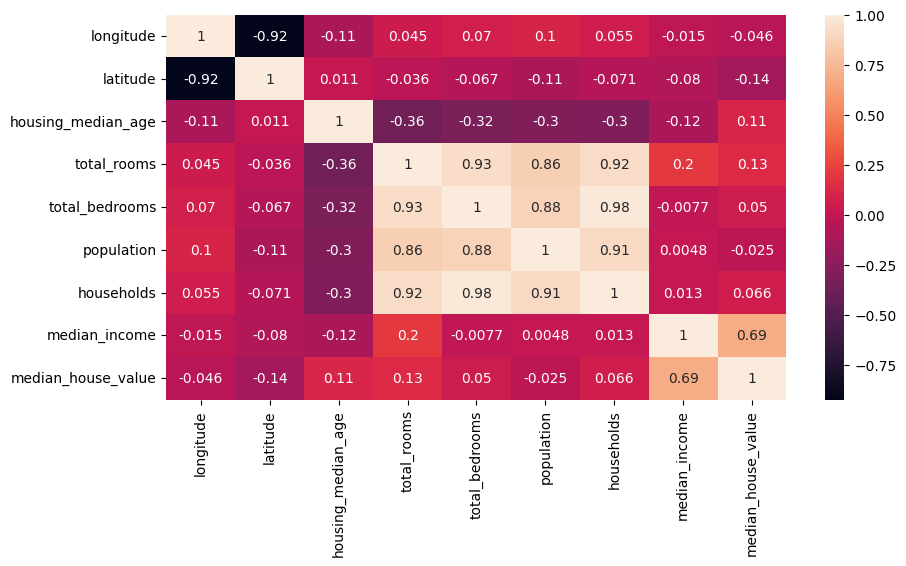

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(data_num.corr(), annot=True)

In [49]:
matriz_correlacion = data_num.corr()
matriz_correlacion['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [50]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(
    data['total_bedrooms'].median()
)


In [51]:
#vamos a probar combinando datos
data_combinada = data_num
data_combinada['rooms_per_house']= data['total_rooms']/data['households'] #vamos a ver como afectan la cantidad de habitaciones por vivienda
data_combinada['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms'] #vamos a ver como afectan la cantidad de cuartos por vivienda
data_combinada['population_per_house'] =data['population']/data['households'] #vamos a ver como afectan la cantidad de habitantes por vivienda
#vamos a crear otra matriz con estos datos combinados
matriz_combinada = data_combinada.corr()
matriz_combinada['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_house,-0.023737
population,-0.024650
longitude,-0.045967


In [52]:
data_ocean = data[['ocean_proximity']]
ordinal_enconder = sk.preprocessing.OrdinalEncoder()
data_ocean_encoded = ordinal_enconder.fit_transform(data_ocean)
np.random.choice(data_ocean_encoded.ravel(), size=10)

array([3., 0., 0., 1., 0., 0., 4., 0., 4., 0.])

In [53]:
cat_encoder = sk.preprocessing.OneHotEncoder()
data_ocean_1hot = cat_encoder.fit_transform(data_ocean)
data_ocean_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
encoded_df = pd.DataFrame(data_ocean_1hot.toarray(), columns=cat_encoder.get_feature_names_out())
encoded_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [56]:
#algoritmos de ml
y = data_combinada['median_house_value'].values.reshape(-1,1)
#para variables dependientes escogemos la q mas correlacion tenga
x = data_combinada[[
  'median_income',
  'rooms_per_house',
  'total_rooms',
  'housing_median_age',
  'households',
  'bedrooms_per_room',
  'population_per_house'
]]
#agregamos las nuevas columnas de datos categoricos
data1 = pd.concat([x, encoded_df], axis=1)
data1.columns

Index(['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age',
       'households', 'bedrooms_per_room', 'population_per_house',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [57]:
x= data1.values


In [58]:
#regresion lineal multiple
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [60]:
y_pred =lin_reg.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.5966548450406939


In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x= sc_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred =lin_reg.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.6075917521164029


no hubo mejora con el escalado de datos

In [62]:
columnas =[
  'median_income',
  'rooms_per_house',
  'total_rooms',
  'housing_median_age',
  'households',
  'bedrooms_per_room',
  'population_per_house',
  'latitude',
  'longitude'
]
col_modelo= []
y =data_combinada['median_house_value'].values.reshape(-1,1)
for col in columnas:
  col_modelo.append(col)
  data1=data_combinada[col_modelo]
  data1 = pd.concat([data1,encoded_df], axis=1)
  x =data1.values
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  lin_reg = LinearRegression()
  lin_reg.fit(x_train, y_train)
  y_pred =lin_reg.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  print("Columnas:", col_modelo, "Calificación:", r2)

Columnas: ['median_income'] Calificación: 0.5849096689376316
Columnas: ['median_income', 'rooms_per_house'] Calificación: 0.5846172641822602
Columnas: ['median_income', 'rooms_per_house', 'total_rooms'] Calificación: 0.5700048305378569
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age'] Calificación: 0.6102630694157363
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households'] Calificación: 0.5949310302383559
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room'] Calificación: 0.6065952332060001
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house'] Calificación: 0.5979461062579032
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house', 'latitude'] Calificación: 0.61136628442814
Co

In [63]:
from sklearn.tree import DecisionTreeRegressor
columnas =[
  'median_income',
  'rooms_per_house',
  'total_rooms',
  'housing_median_age',
  'households',
  'bedrooms_per_room',
  'population_per_house',
  'latitude',
  'longitude'
]
col_modelo= []
y =data_combinada['median_house_value'].values.reshape(-1,1)
for col in columnas:
  col_modelo.append(col)
  data1=data_combinada[col_modelo]
  data1 = pd.concat([data1,encoded_df], axis=1)
  x =data1.values
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  tree_reg = DecisionTreeRegressor()
  tree_reg.fit(x_train, y_train)
  y_pred = tree_reg.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  print("Columnas:", col_modelo, "Calificación:", r2)


Columnas: ['median_income'] Calificación: 0.2721042011930074
Columnas: ['median_income', 'rooms_per_house'] Calificación: 0.2078486186375642
Columnas: ['median_income', 'rooms_per_house', 'total_rooms'] Calificación: 0.24723006463742536
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age'] Calificación: 0.3148642123397192
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households'] Calificación: 0.3437994876065448
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room'] Calificación: 0.3857272873092087
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house'] Calificación: 0.49064127995920503
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house', 'latitude'] Calificación: 0.581352831414268

In [64]:
from sklearn.ensemble import RandomForestRegressor
columnas =[
  'median_income',
  'rooms_per_house',
  'total_rooms',
  'housing_median_age',
  'households',
  'bedrooms_per_room',
  'population_per_house',
  'latitude',
  'longitude'
]
col_modelo= []
y =data_combinada['median_house_value'].values
for col in columnas:
  col_modelo.append(col)
  data1=data_combinada[col_modelo]
  data1 = pd.concat([data1,encoded_df], axis=1)
  x =data1.values
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  forest_reg = RandomForestRegressor()
  forest_reg.fit(x_train, y_train)
  y_pred = forest_reg.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  print("Columnas:", col_modelo, "Calificación:", r2)

Columnas: ['median_income'] Calificación: 0.4669365771309396
Columnas: ['median_income', 'rooms_per_house'] Calificación: 0.5436756594160022
Columnas: ['median_income', 'rooms_per_house', 'total_rooms'] Calificación: 0.595348036086025
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age'] Calificación: 0.6414115967065623
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households'] Calificación: 0.6376404700331058
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room'] Calificación: 0.6593355145836566
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house'] Calificación: 0.7381160704287959
Columnas: ['median_income', 'rooms_per_house', 'total_rooms', 'housing_median_age', 'households', 'bedrooms_per_room', 'population_per_house', 'latitude'] Calificación: 0.7776762238028745
C